<a href="https://colab.research.google.com/github/rat-nick/ml-lab/blob/main/Linearna-Regresija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linearna Regresija

Linearna regresija predstavlja model mašinskog učenja koji je pogodan za modelovanje linearnih odnosa medju promenjivama.
Ona predstavlja specijalan slučaj linearnog modela gde je broj nezavisnih promenjivih 1. Nezavisne promenjive su one na osnovu kojih treba dati predikciju vrednosti zavisne.

Kada je reč o linearnoj regresiji, cilj nam je da, sa što manjom greškom, predvidimo vrednost zavisne na osnovu vrednosti nezavisne promenjive.

Suštinski, model linearne regresije jeste linearna funkcija sledećeg oblika:

\begin{equation}
  y = α + βx
\end{equation}

Ova jednačina opisuje pravu sa koeficijentom pravca β i isečkom na y osi α.

Svaka tačka iz skupa podataka može biti prikazana kao
\begin{equation}
  y_i = α + βx_i + 𝜀_i
\end{equation}

gde $𝛆_i$ predstavlja grešku.

Cilj obučavanja ovog modela jeste da se nađu optimalne vrednosti parametara $α$ i $β$, takvi da, na izvestan način, minimizuju grešku.

Import neophodnih biblioteka


*   **pandas** za ucitavanje i obradu tabelarnih podataka
*   **seaborn** za crtanje grafika
*   **pyplot** za finiju kontrolu nad graficima



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


## Ucitavanje skupa podataka

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Eksploratorna analiza podataka

Ovaj korak je potreban kako bismo bolje razumeli strukturu podataka i eventualno otklonili nedostatke.
Dobra eksploratorna analiza podrazumeva:


1.   Razumevanje domena problema
2.   Razumevanje tehnika vizuelizacije



### Vizuelizacija

Prirodu podataka je najlakse uvideti koriscenjem grafika. Dobro osmisljeni grafici mogu pomoci da se utvrde trendovi i zavisnosti koje nije lako uociti jednostavnim tabelarnim pregledom

#### Cena usluga u zavisnosti od godina, bmi i broja dece

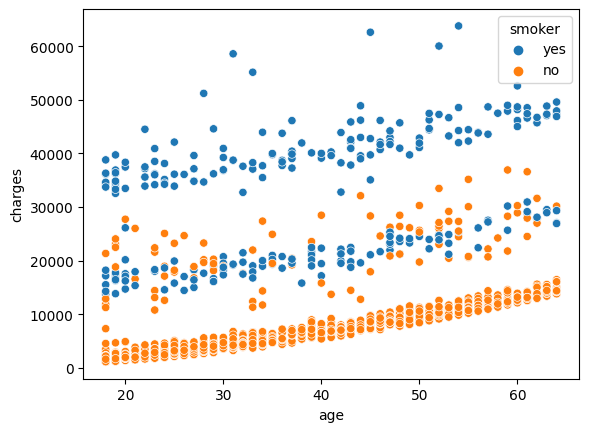

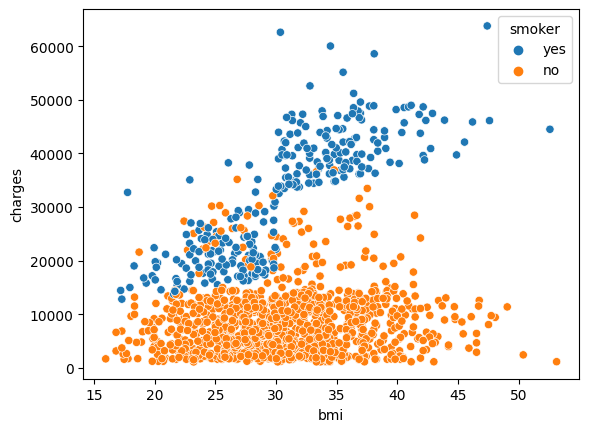

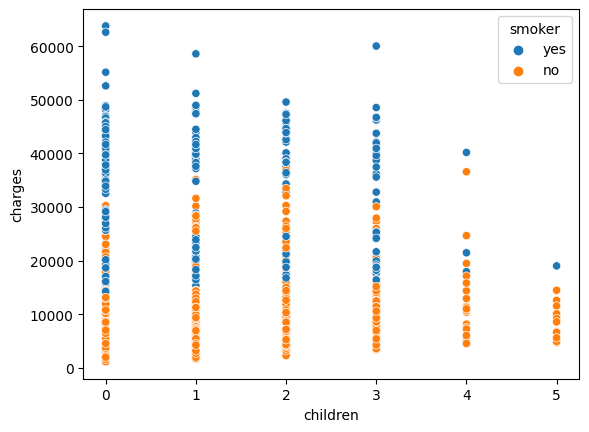

In [24]:
sns.scatterplot(data, x=data['age'], y=data['charges'], hue=data['smoker'])
plt.show()
sns.scatterplot(data, x=data['bmi'], y=data['charges'], hue=data['smoker'])
plt.show()
sns.scatterplot(data, x=data['children'], y=data['charges'], hue=data['smoker'])
plt.show()

#### Tumačenje grafika

Jasno se vidi da nepušači imaju niže cene osiguranja nego pušači. Te tvrdjne možemo dokazati i statistički tako što ćemo videti kakva je raspodela cena kod pušača i nepušača.

In [25]:
pusaci = data.loc[data['smoker'] == 'yes']
nepusaci = data.loc[data['smoker'] == 'no']
print(pusaci.charges.mean(), pusaci.charges.std())
print(nepusaci.charges.mean(), nepusaci.charges.std())

32050.23183153284 11541.547175589121
8434.268297856204 5993.7818191949345


Iste tvrdnje se mogu zaključiti i sa sledećih grafika

<Axes: xlabel='smoker', ylabel='charges'>

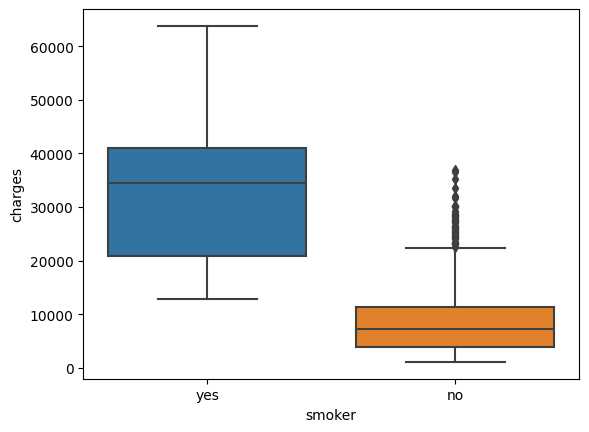

In [26]:
sns.boxplot(data, x='smoker', y='charges')

#### Cena usluge u zavisnosti od regiona

Nije potrebno domensko znanje da bismo znali da razliciti regioni velikih država poput SAD imaju različite životne standarde. Stoga ima smisla porediti raspodele cena u odnosu na regione.

<Axes: xlabel='region', ylabel='charges'>

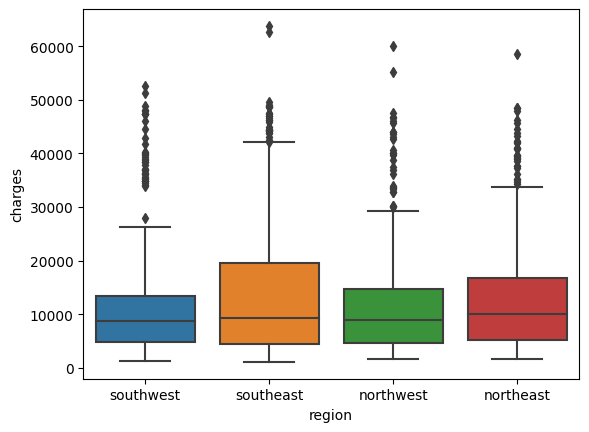

In [30]:
sns.boxplot(data, x='region', y='charges')

#### Tumačenje grafika

Na osnovu grafika se ne može na prvi pogled zaključiti da postoji značajna razlika u ceni.

<ipython-input-27-04c2686bb54b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = data.corr()


<Axes: >

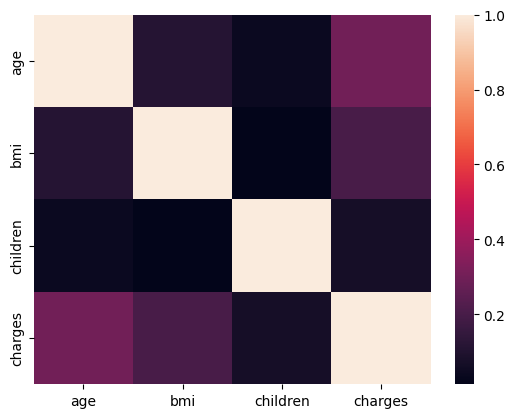

In [27]:
cor = data.corr()
sns.heatmap(cor)

## Trening test split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2)

print(len(train))
print(len(test))

219
55


## Definicija linearnog modela i treniranje

In [ ]:
from sklearn.linear_model import LinearRegression
# definicija modela
model = LinearRegression()
# treniranje (fitovanje) modela
model.fit(train[['age', 'bmi', 'children']], train['charges'])



LinearRegression()

## Testiranje modela

In [ ]:
from sklearn.metrics import mean_squared_error
import math
y_true = test['charges']
y_pred = model.predict(test[['age','bmi', 'children']])

rmse = math.sqrt(mean_squared_error(y_true, y_pred))
print(rmse)


6606.006779748288


In [33]:
!git commit -m "Dodatna objasnjenja"

fatal: not a git repository (or any of the parent directories): .git
